## Dataset Description: Risk Factors for Coronary Heart Disease
This dataset focuses on identifying potential risk factors for coronary heart disease. It includes demographic, behavioral, and medical risk factors, as well as the target variable for predicting CHD.
The dataset is downloaded from Kaggle.
---
[dataset](https://www.kaggle.com/datasets/navink25/framingham)
---
These attributes capture basic information about the patient.
- **`Sex`**: 
  - Type: Nominal
  - Description: Indicates the gender of the patient (male or female).
- **`Age`**: 
  - Type: Continuous
  - Description: The age of the patient in whole numbers. Age is conceptually continuous.
---
These attributes relate to the patient's habits and lifestyle.
- **`Current Smoker`**: 
  - Type: Nominal
  - Description: Indicates whether the patient currently smokes (Yes/No).
- **`Cigs Per Day`**: 
  - Type: Continuous
  - Description: The average number of cigarettes smoked by the patient per day.
---
These attributes describe the patient's medical history.
- **`BP Meds`**: 
  - Type: Nominal
  - Description: Indicates whether the patient was on blood pressure medication (Yes/No).
- **`Prevalent Stroke`**: 
  - Type: Nominal
  - Description: Indicates whether the patient had a prior stroke (Yes/No).
- **`Prevalent Hyp`**: 
  - Type: Nominal
  - Description: Indicates whether the patient had hypertension (Yes/No).
- **`Diabetes`**: 
  - Type: Nominal
  - Description: Indicates whether the patient had diabetes (Yes/No).
---
These attributes represent the patient’s current health metrics.
- **`Tot Chol`**: 
  - Type: Continuous
  - Description: Total cholesterol level of the patient.
- **`Sys BP`**: 
  - Type: Continuous
  - Description: Systolic blood pressure of the patient.
- **`Dia BP`**: 
  - Type: Continuous
  - Description: Diastolic blood pressure of the patient.
- **`BMI`**: 
  - Type: Continuous
  - Description: Body Mass Index of the patient.
- **`Heart Rate`**: 
  - Type: Continuous
  - Description: Heart rate of the patient. Although technically discrete, it is treated as continuous due to the large range of possible values.
- **`Glucose`**: 
  - Type: Continuous
  - Description: Glucose level of the patient.
---
The outcome variable for predicting the risk of coronary heart disease (CHD).
- **`10-Year CHD Risk`**: 
  - Type: Binary
  - Description: Indicates whether the patient has a 10-year risk of developing CHD.  
    - **`1`**: Yes  
    - **`0`**: No

# Importing Required Libraries and Modules

In [1]:
import numpy as np    # For numerical computations
import pandas as pd   # For data manipulation and analysis
import matplotlib.pyplot as plt    # For data visualization
import seaborn as sns               # For advanced data visualization
from sklearn.model_selection import train_test_split,GridSearchCV # For splitting data and hyperparameter tuning 
from sklearn.preprocessing import LabelEncoder,StandardScaler # For feature encoding and scaling
from sklearn.metrics import accuracy_score,recall_score ,classification_report, confusion_matrix,roc_curve, auc # For model evaluation
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

import warnings

warnings.filterwarnings(action="ignore")
sns.set_style("darkgrid")


In [2]:
df=pd.read_csv("framingham.csv")  # Loading the Dataset


In [3]:
def information(data):
    d_type=data.dtypes
    n_o_U=data.nunique()
    nulls=data.isnull().sum()

    print(pd.DataFrame({"d_types":d_type,"n_uniques":n_o_U,"n_nuls":nulls},index=data.columns))
    print(f"data have  {data.duplicated().sum()} numbers of duplications ")
    print(f"this data have {data.shape[0]} records and {data.shape[1] }  features")
    
    


##### This Method Provides Information About the Dataset

In [4]:
def train_classifier(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on train and test data 
    y_pred = model.predict(x_test)
    y_pred_prob=model.predict_proba(x_test)[:, 1]
    y_train_pred = model.predict(x_train)
    
    # Calculate metrics for testing
    accuracy = accuracy_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Calculate metrics for training 
    accuracy_t = accuracy_score(y_train, y_train_pred)
    recall_t=recall_score(y_train, y_train_pred)
    class_report_t = classification_report(y_train, y_train_pred)
    conf_matrix_t = confusion_matrix(y_train, y_train_pred)
    
    print(f"Accuracy for train is : {accuracy_t } %   Accuracy for test is : {accuracy} % ")
    print(f"recall for train is : {recall_t } %   recall for test is : {recall} % ")
    print("\nClassification Report for train :")
    print(class_report_t)
    print("\nClassification Report for test :")
    print(class_report)
    print("\nConfusion Matrix for train :")
    print(conf_matrix_t)
    print("\nConfusion Matrix for test :")
    print(conf_matrix)


    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### This Function is Used to Train and Evaluate the Machine Learning Models

In [5]:
def plot_decision_boundary(model, X, y):
   
    # Create a mesh grid for the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for all points in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of {model.__class__.__name__}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

### this method used to Visualizes the decision boundary of the classifier with 2_d datasets. 

In [6]:
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
information(df)

                 d_types  n_uniques  n_nuls
Sex               object          2       0
age                int64         39       0
education        float64          4     105
currentSmoker     object          2       0
cigsPerDay       float64         33      29
BPMeds           float64          2      53
prevalentStroke    int64          2       0
prevalentHyp       int64          2       0
diabetes          object          2       0
totChol          float64        248      50
sysBP            float64        234       0
diaBP            float64        146       0
BMI              float64       1364      19
heartRate        float64         73       1
glucose          float64        143     388
TenYearCHD         int64          2       0
data have  0 numbers of duplications 
this data have 4240 records and 16  features


## Data Information

We have some information about the data, which includes the following:
### Continuous Columns:
- `age`
- `cigsPerDay`
- `totChol`
- `sysBP`
- `diaBP`
- `BMI`
- `heartRate`
- `glucose`
### Categorical Columns:
- `BPMeds`
- `prevalentStroke`
- `prevalentHyp`
- `Sex`
- `diabetes`
### Irrelevant and Redundant Columns:
- `education` (irrelevant)
- `currentSmoker` (redundant) with 'cigsPerDay. '
As a result, we have dropped these columns from the dataset.

In [8]:
df.drop(["education","currentSmoker"],axis=1,inplace=True)

In [9]:
con_clos=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
nom_numCols=["BPMeds","prevalentStroke","prevalentHyp"]
cat_cols=["Sex","diabetes"]

### Column Types in the Dataset

- **`con_cols`**: Refers to the continuous columns in the dataset.  
  These columns contain numerical values that can take any value within a range .

- **`nom_numcols`**: Refers to nominal columns represented as numerical values.  
  These are categorical variables encoded as numbers without any inherent order .

- **`cat_col`**: Refers to the categorical columns in the dataset.  
  These columns contain values representing categories .

# EDA

In [10]:
df["TenYearCHD"].value_counts()  

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

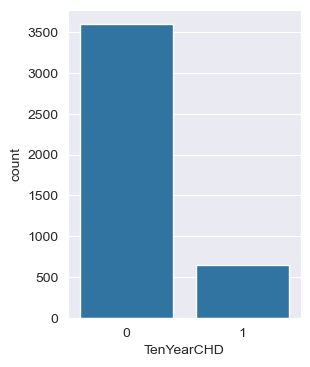

In [11]:
plt.figure(figsize=(3,4))
sns.countplot(data=df,x=df["TenYearCHD"])
plt.show()

The target column in the dataset shows imbalanced data. This means that the number of people without heart disease is significantly larger than those with heart disease.

---
This means that the distribution of values in the target column is not uniform, which could impact the performance of certain machine learning models.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.354599,22.033300,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.897759,11.910394,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.800801,4.079840,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.878981,12.025348,44.00,68.00,75.0,83.00,143.0


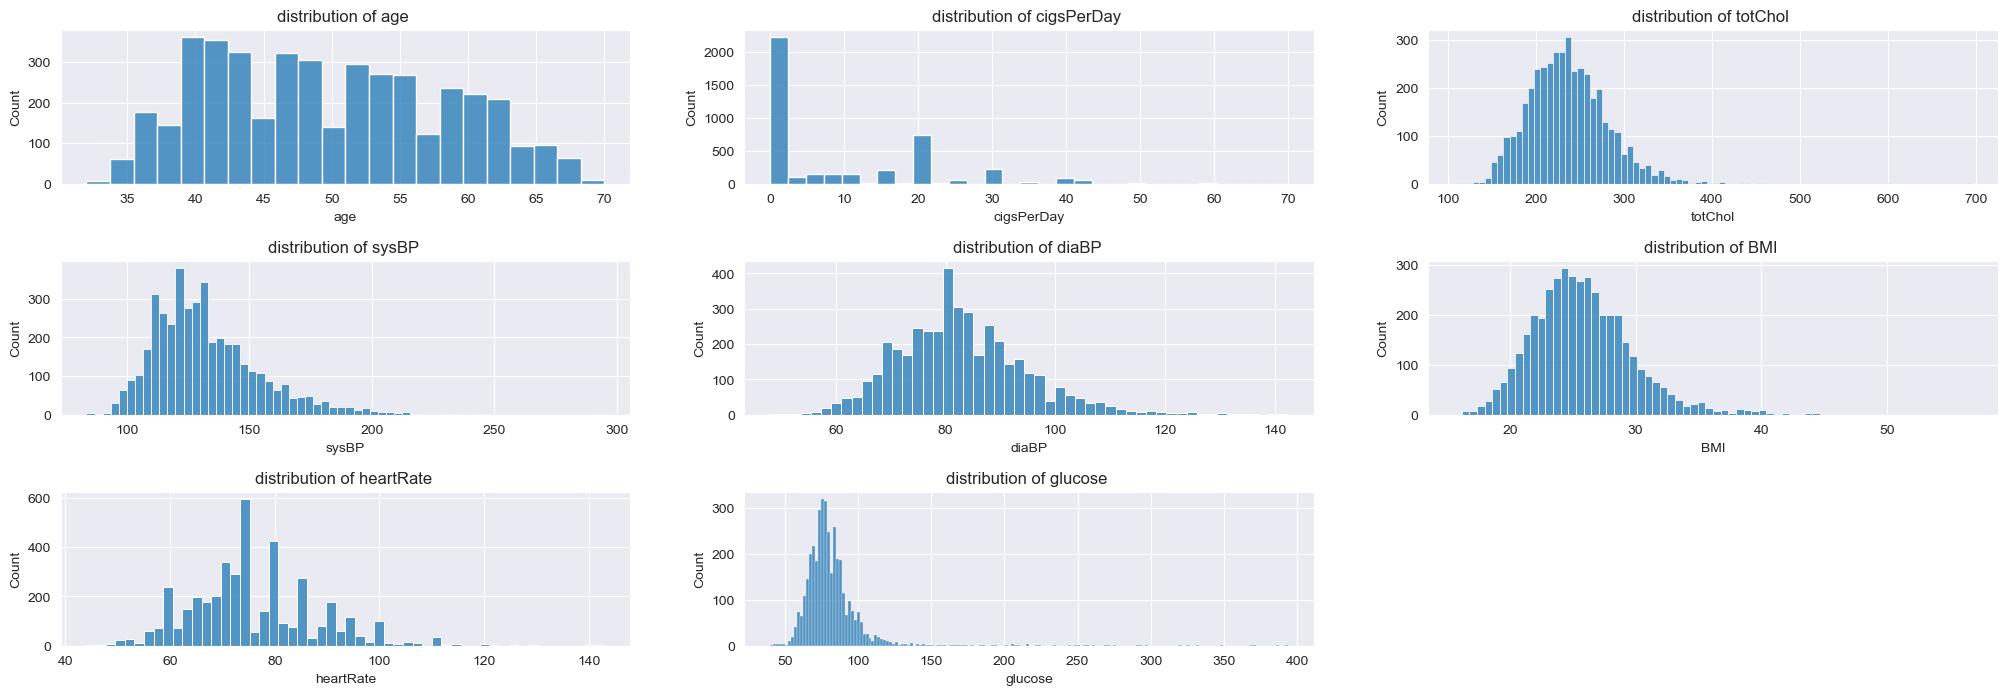

In [13]:
plt.figure(figsize=(25,8))
for i,col in enumerate(con_clos):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df,x=col)
    plt.title(f"distribution of {col} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)

plt.show()

The following plot represents the distribution of values in the continuous columns of the dataset.

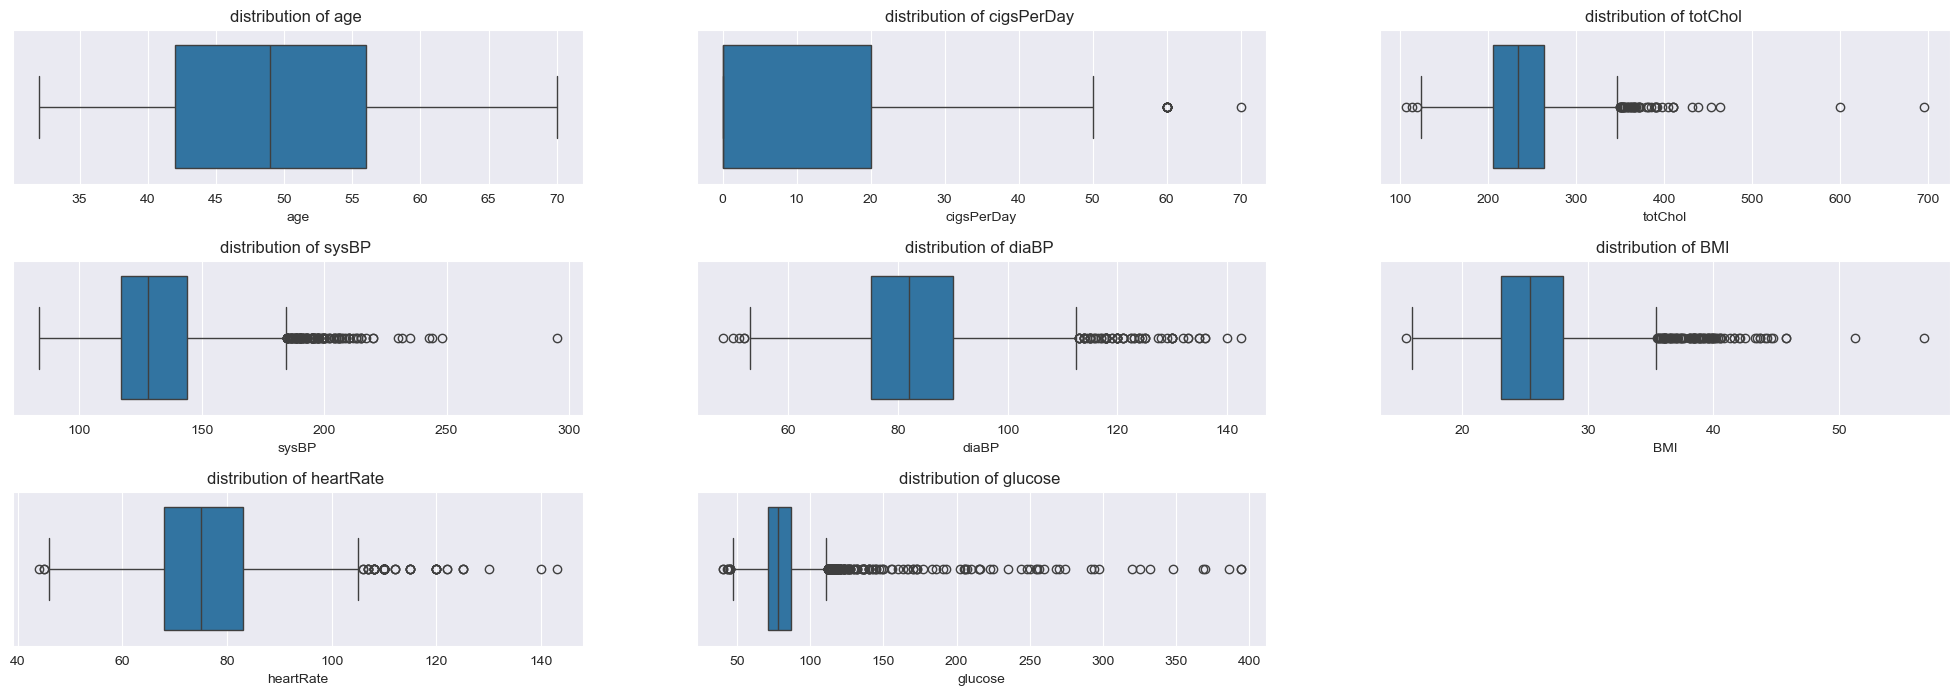

In [14]:
plt.figure(figsize=(25,8))
for i,col in enumerate(con_clos):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,x=col)
    plt.title(f"distribution of {col} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)

plt.show()

This section shows the outliers in the continuous columns.
After examining the data, we detected that there are no values that can be identified as outliers.
---
### Data Distribution Summary

- **Age**: It follows a normal distribution, indicating symmetrical variation among the age intervals.

- **Total Cholesterol (totChol)**, **Systolic Blood Pressure (sysBP)**, **Diastolic Blood Pressure (diaBP)**, and **BMI (Body Mass Index)**:  
  These variables follow a normal distribution, showing symmetrical differences.

- **Heart Rate** and **Glucose Levels**:  
  These variables follow a normal distribution.

- **Cigarettes Per Day (CigsPerDay)**:  
  This variable is positively skewed.



TenYearCHD  BPMeds
0           0.0       3471
            1.0         83
1           0.0        592
            1.0         41
Name: count, dtype: int64
TenYearCHD  prevalentStroke
0           0                  3582
            1                    14
1           0                   633
            1                    11
Name: count, dtype: int64
TenYearCHD  prevalentHyp
0           0               2604
            1                992
1           1                325
            0                319
Name: count, dtype: int64


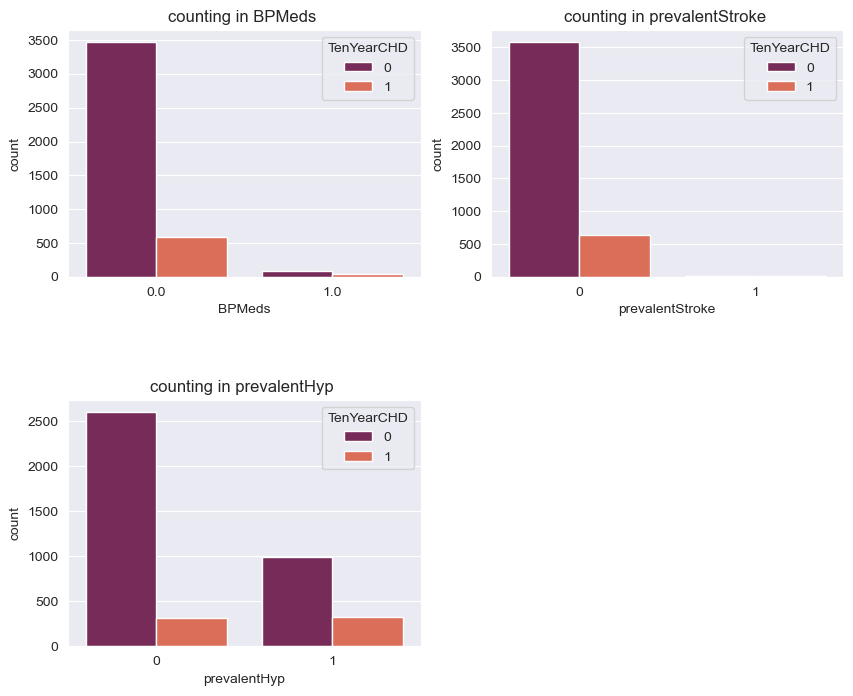

In [15]:
plt.figure(figsize=(10,8))
for i,col in enumerate(nom_numCols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col,hue="TenYearCHD",palette="rocket")
    plt.title(f"counting in {col} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)
    print(df.groupby(["TenYearCHD"])[col].value_counts())

plt.show()

- The number of individuals at risk of heart disease is significantly smaller compared to those not at risk.

- **Blood Pressure Medication [BPMeds]**:  
  People taking blood pressure medications are more likely to develop heart disease compared to those who do not.

- **Stroke [PrevalentStroke]**:  
  Individuals who have suffered a stroke are also more likely to develop heart disease, though they represent a very small minority.

- **High Blood Pressure[PrevalentHyp]**:  
  A clear relationship is evident among those who suffer from high blood pressure and their likelihood of developing heart disease.

TenYearCHD  Sex   
0           female    2119
            male      1477
1           male       343
            female     301
Name: count, dtype: int64
TenYearCHD  diabetes
0           No          3527
            Yes           69
1           No           604
            Yes           40
Name: count, dtype: int64


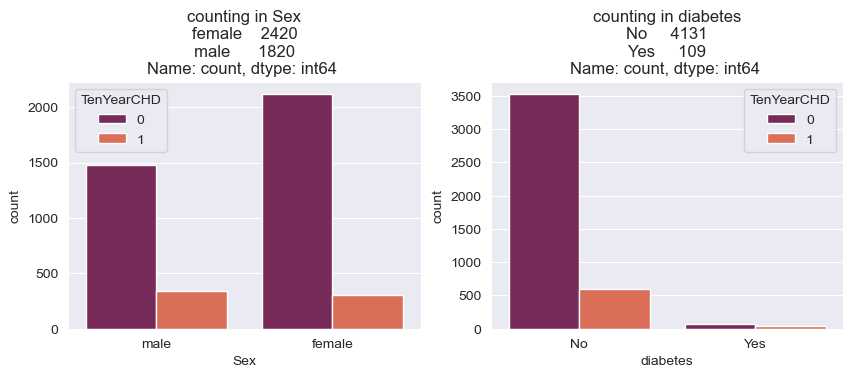

In [16]:
plt.figure(figsize=(10,8))
for i,col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col,hue="TenYearCHD",palette="rocket")
    plt.title(f"counting in {df[col].value_counts()} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)
    print(df.groupby(["TenYearCHD"])[col].value_counts())

plt.show()

- The number of **male** is smaller than the number of **female**, but male are more likely to develop heart disease compared to femal.

- A **significant percentage of individuals with diabetes** are at a high risk of developing heart disease.

<Figure size 1000x800 with 0 Axes>

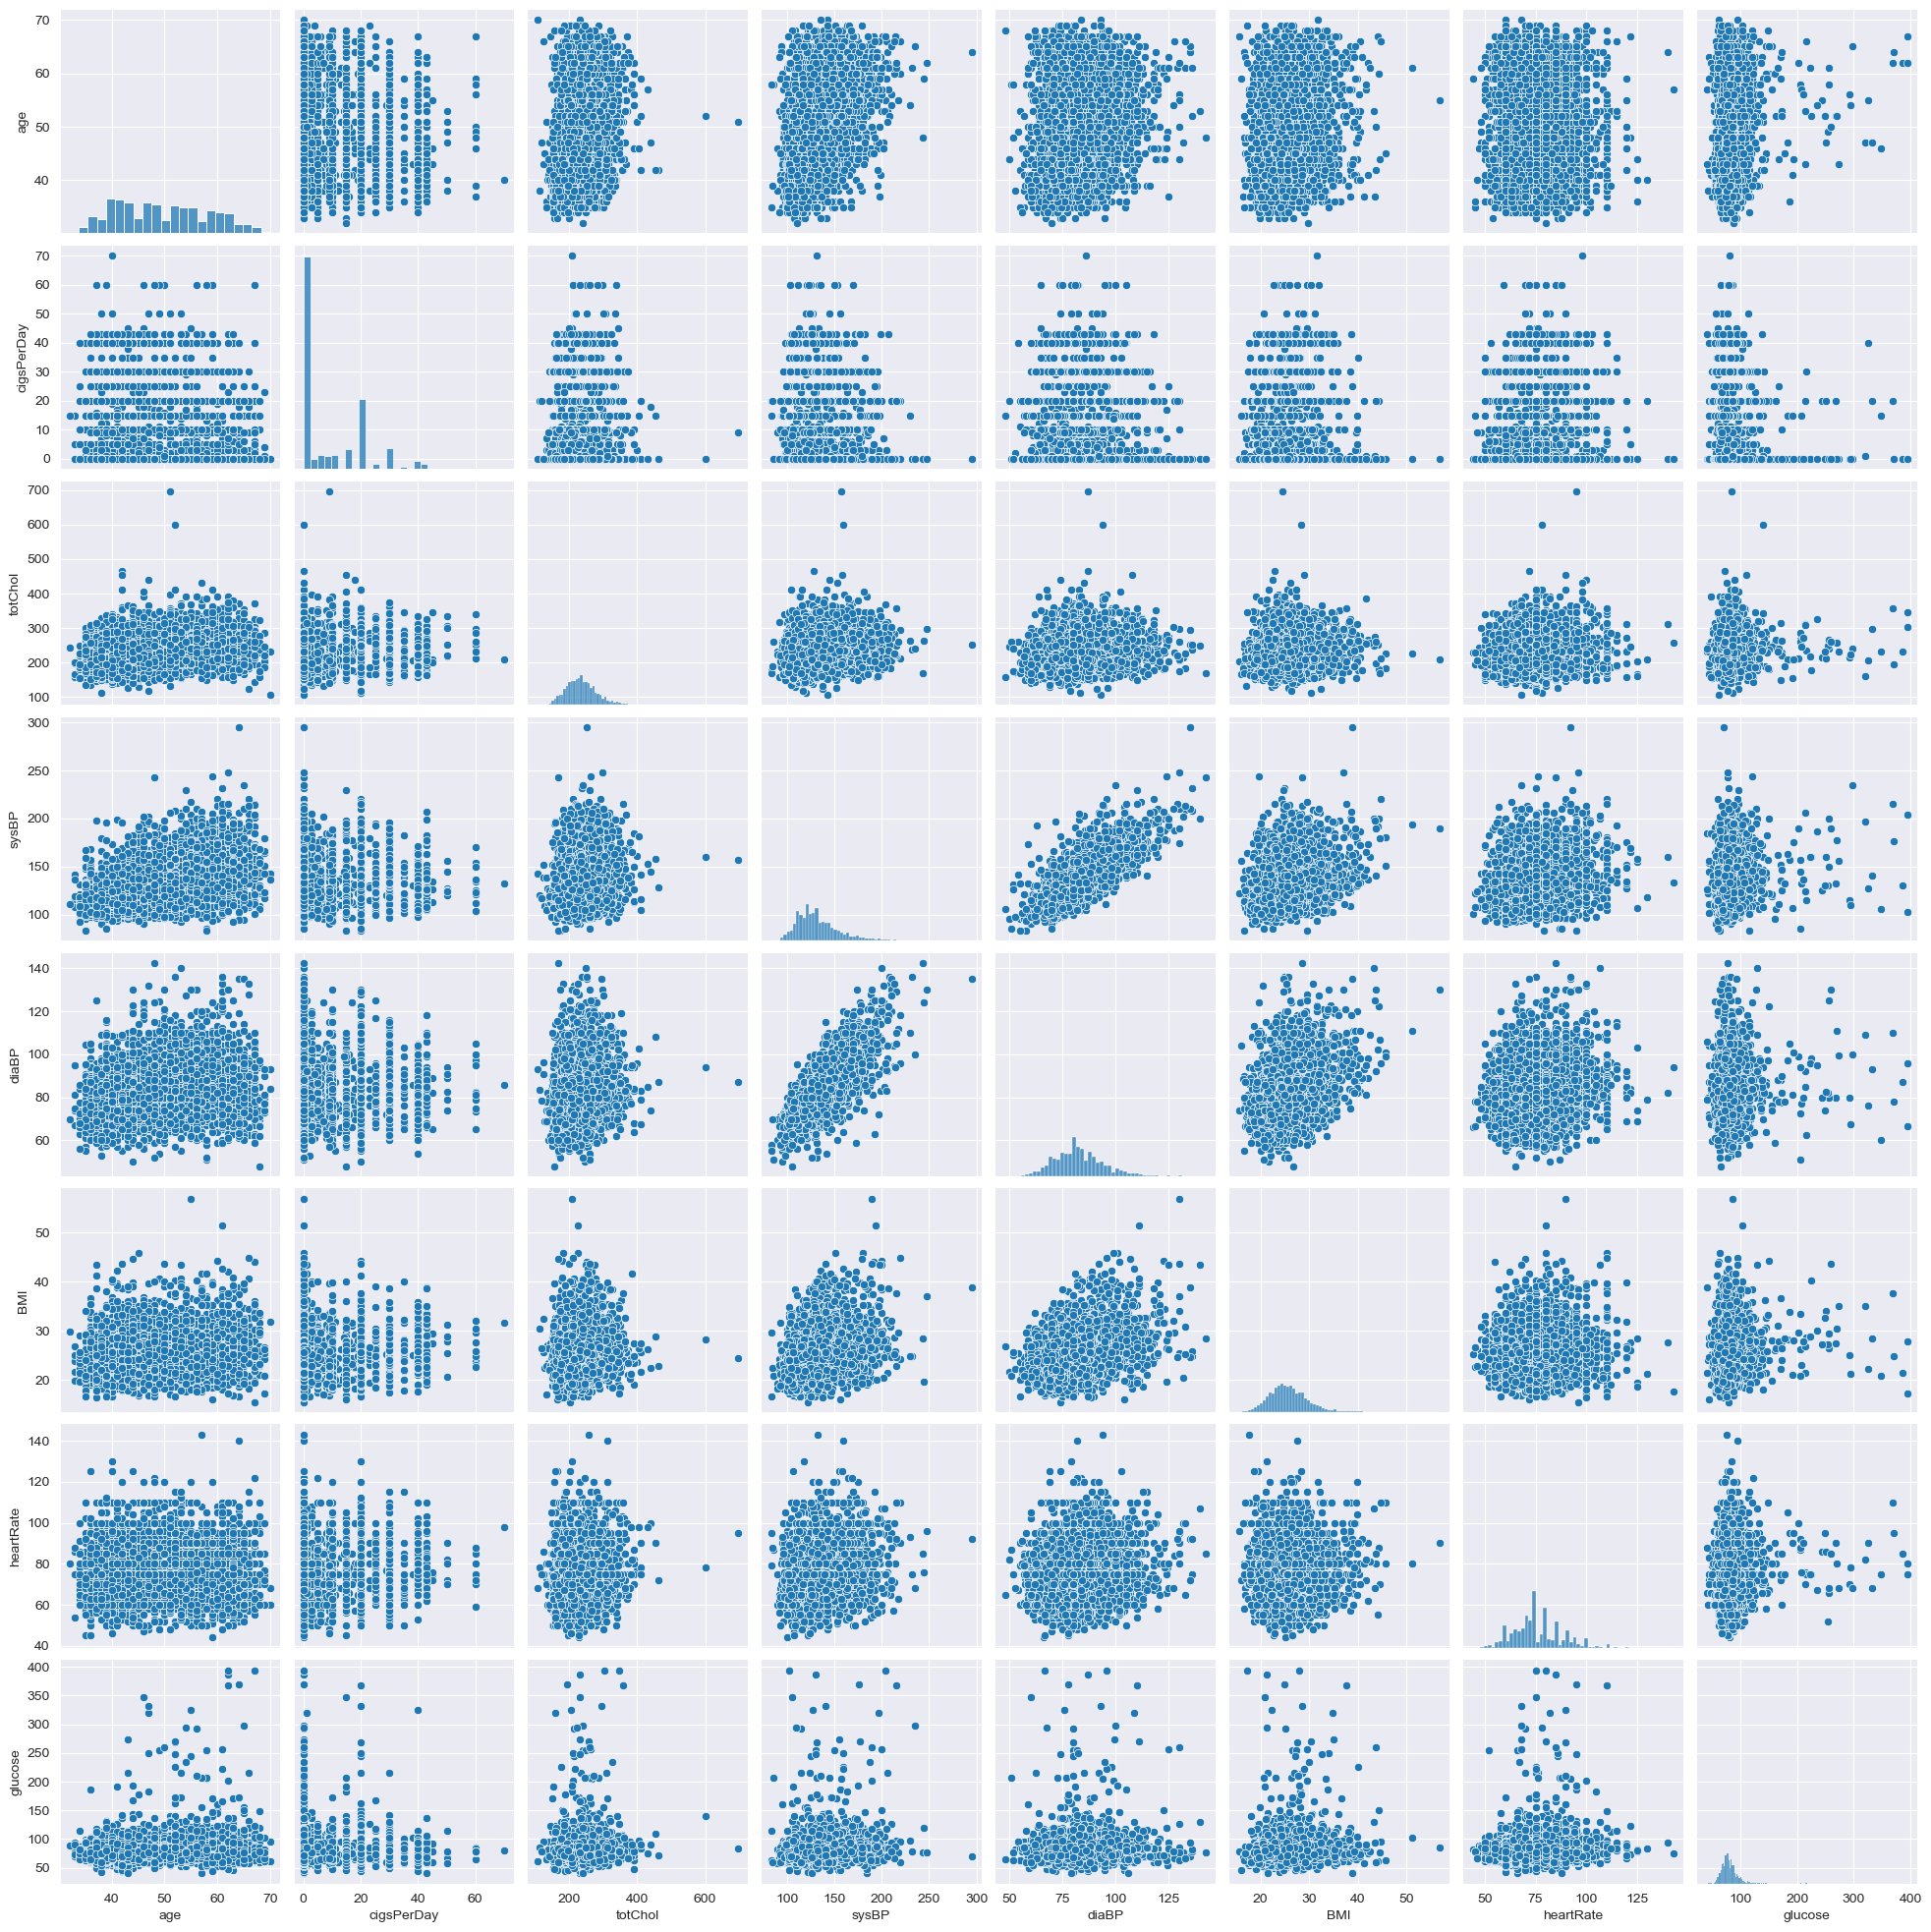

In [17]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df[con_clos])

plt.show()

plotting To analyze the correlation between continuous variables, we examine how these variables relate to each other to identify patterns or associations.







TenYearCHD
0    48.762514
1    54.145963
Name: age, dtype: float64
TenYearCHD
0     8.713925
1    10.629283
Name: cigsPerDay, dtype: float64
TenYearCHD
0    235.147398
1    245.388976
Name: totChol, dtype: float64
TenYearCHD
0    130.337319
1    143.618789
Name: sysBP, dtype: float64
TenYearCHD
0    82.166435
1    86.981366
Name: diaBP, dtype: float64
TenYearCHD
0    25.671659
1    26.531451
Name: BMI, dtype: float64
TenYearCHD
0    75.762514
1    76.530327
Name: heartRate, dtype: float64
TenYearCHD
0    80.679251
1    89.008418
Name: glucose, dtype: float64


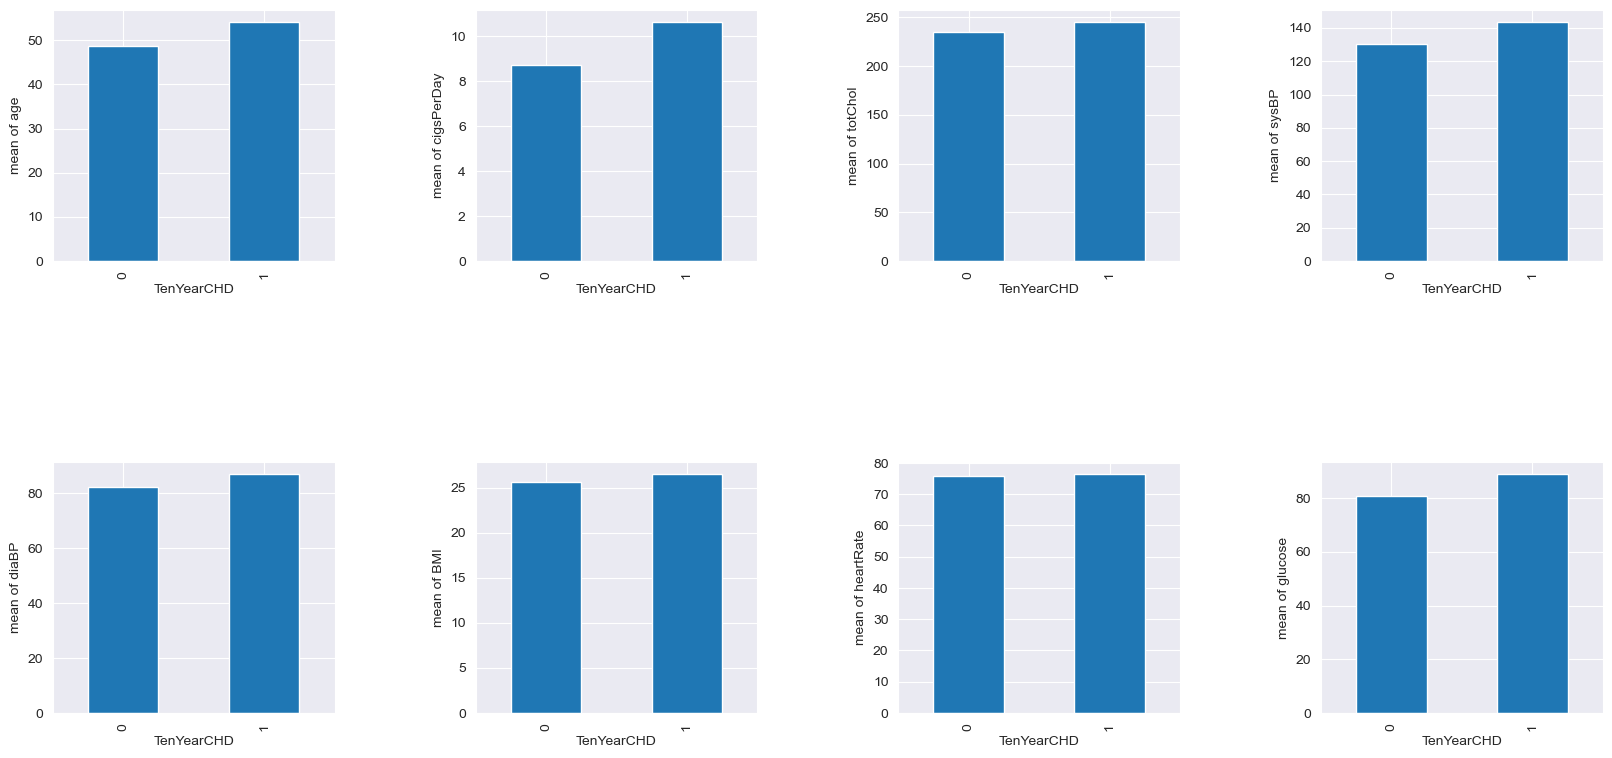

In [18]:
plt.figure(figsize=(20,15))
for i,col in enumerate(con_clos):
    plt.subplot(3,4,i+1)
    df.groupby("TenYearCHD")[col].mean().plot(kind="bar")
    plt.ylabel(f"mean of {col }")  
    print(df.groupby("TenYearCHD")[col].mean())
    plt.subplots_adjust(hspace=.8,wspace=.5)
plt.show()

### Plot Description: Average of Continuous Columns by Target Values

This plot illustrates the average values of all continuous columns, grouped by the two categories in the target column. It provides insights into how the continuous variables differ based on the target classification.

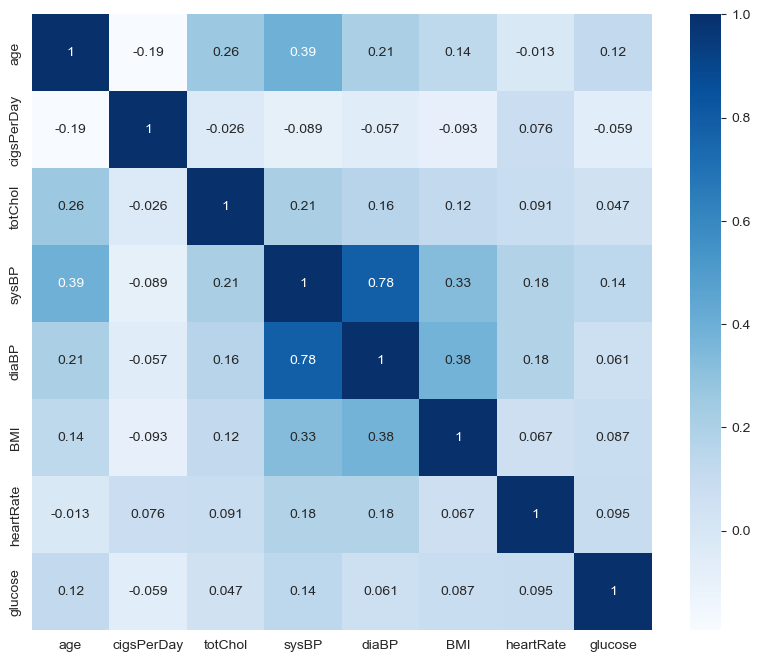

In [19]:
corr_matrix = df[con_clos].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()

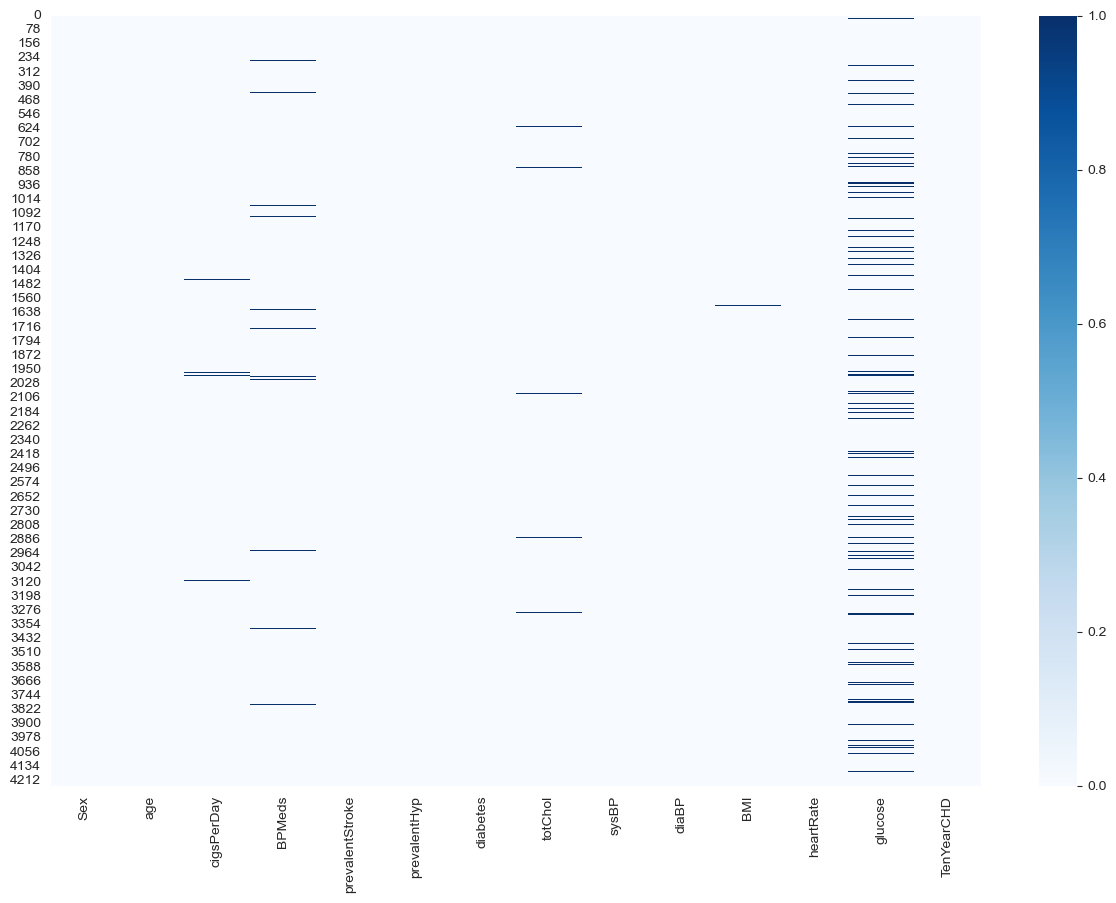

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap="Blues")
plt.show()

### Distribution of Nulls in the Dataset

This section shows the distribution of null values in our dataset.

In [21]:
df[nom_numCols]=df[nom_numCols].astype("category")
df[cat_cols]=df[cat_cols].astype("category")

We convert the data type of selected features to `category` for better data handling and analysis.

In [22]:
information(df)

                  d_types  n_uniques  n_nuls
Sex              category          2       0
age                 int64         39       0
cigsPerDay        float64         33      29
BPMeds           category          2      53
prevalentStroke  category          2       0
prevalentHyp     category          2       0
diabetes         category          2       0
totChol           float64        248      50
sysBP             float64        234       0
diaBP             float64        146       0
BMI               float64       1364      19
heartRate         float64         73       1
glucose           float64        143     388
TenYearCHD          int64          2       0
data have  0 numbers of duplications 
this data have 4240 records and 14  features


# Data cleaning 

filling nulls values on every column  

In [23]:
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].median())
df["BPMeds"]=df["BPMeds"].fillna(method="ffill")
df["totChol"]=df["totChol"].fillna(df["totChol"].median())
df["BMI"]=df["BMI"].fillna(df["BMI"].median())
df.dropna(subset="heartRate",inplace=True)
df["glucose"]=df["glucose"].fillna(df["glucose"].median())

In [24]:
information(df)

                  d_types  n_uniques  n_nuls
Sex              category          2       0
age                 int64         39       0
cigsPerDay        float64         33       0
BPMeds           category          2       0
prevalentStroke  category          2       0
prevalentHyp     category          2       0
diabetes         category          2       0
totChol           float64        248       0
sysBP             float64        234       0
diaBP             float64        146       0
BMI               float64       1364       0
heartRate         float64         73       0
glucose           float64        143       0
TenYearCHD          int64          2       0
data have  0 numbers of duplications 
this data have 4239 records and 14  features


# now data is cleaned let's do preprocessing

In [25]:
X=df.drop("TenYearCHD",axis=1)
Y=df["TenYearCHD"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=42)


### Splitting the Data into Training and Testing Sets

In [26]:
encoders={}
for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(x_train[col])
    x_train[col]=encoder.transform(x_train[col])
    x_test[col]=encoder.transform(x_test[col])
    encoders[col]=encoder

### Encoding Object Columns to Numeric Values Using Label Encoder
We store each encoder in a dictionary to facilitate reuse during deployment.


In [27]:
x_train1=x_train.copy()
x_test1=x_test.copy()

We create a copy of the dataset to perform scaling on the copy. This results in two versions of the data:
- One version is [x_train , x_test] **not scaled**.
- The other version remains [x_train1 , x_test1] **scaled**.

In [28]:
scaller=StandardScaler()
x_train1[con_clos]=scaller.fit_transform(x_train1[con_clos])
x_test1[con_clos]=scaller.transform(x_test1[con_clos])


In [29]:
x_train.head()

,Sex,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2637,1,61,20.0,0.0,0,0,0,215.0,114.0,72.5,25.86,65.0,61.0
1188,0,63,0.0,0.0,0,1,0,306.0,177.0,96.0,32.51,90.0,126.0
2298,1,60,40.0,0.0,0,1,0,230.0,149.0,95.0,26.68,67.0,92.0
3092,0,60,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.0
2032,0,38,0.0,0.0,0,0,0,196.0,100.0,80.0,22.90,78.0,74.0


#### not scalled data 

In [30]:
x_train1.head()

,Sex,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2637,1,1.331458,0.926563,0.0,0,0,0,-0.486362,-0.828387,-0.874077,0.005726,-0.915897,-0.891388
1188,0,1.564781,-0.757760,0.0,0,1,0,1.625573,1.992535,1.085919,1.646083,1.161765,1.919973
2298,1,1.214797,2.610886,0.0,0,1,0,-0.138241,0.738792,1.002515,0.207995,-0.749684,0.449415
3092,0,1.214797,-0.757760,0.0,0,1,0,1.439908,0.022367,0.502090,-0.184210,0.580020,-0.026354
2032,0,-1.351752,-0.757760,0.0,0,0,0,-0.927316,-1.455259,-0.248546,-0.724418,0.164488,-0.329116


#### scalled data

### now finished preprocessing let's apply and evaluate some classification models 

## first what should i know about my Evaluation Metrics 
1. **Accuracy**:  
   - Measures the overall correctness of the model by calculating the proportion of correctly predicted instances (both positive and negative) out of the total predictions.  
   - Formula:  
     \[
     \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}
     \]

2. **Precision**:  
   - Focuses on the quality of positive predictions, indicating how many of the predicted positive instances are actually positive.  
   - Useful when minimizing false positives is important.  
   - Formula:  
     \[
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
     \]

3. **Recall (Sensitivity or True Positive Rate)**:  
   - Measures the ability of the model to identify all actual positive instances.  
   - Useful when minimizing false negatives is crucial.  
   - Formula:  
     \[
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     \]

4. **ROC Curve (Receiver Operating Characteristic)**:  
   - A graphical representation of the model’s performance by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different classification thresholds.  
   - **TPR** (Recall) represents the proportion of actual positives correctly identified.  
   - **FPR** represents the proportion of actual negatives incorrectly classified as positive.  
   - The area under the ROC curve (**AUC**) is used to measure the model's overall ability to distinguish between classes

### Summary:  
- **Accuracy** provides an overall performance measure but can be misleading for imbalanced datasets.  
- **Precision** is critical when false positives are costly.  
- **Recall** is vital when missing true positives has severe consequences.
- **ROC Curve** A model that performs well will have an ROC curve that is closer to the top-left corner, indicating high sensitivity and low false positive rates.
  


In the context of predicting heart disease, it is crucial to prioritize the following:  
- **Maximizing True Positives (Recall)**:  
  Identifying individuals who truly have heart disease is critical for early intervention and treatment. Missing these cases (false negatives) could lead to severe consequences.

- **Minimizing False Negatives**:  
  A false negative occurs when the model predicts that a person does not have heart disease when, in fact, they do. Reducing false negatives is essential to ensure no high-risk individual is overlooked.

### Why Recall Matters:  
Given the life-threatening nature of heart disease, **Recall** (True Positive Rate) is the most important metric. It ensures that the model is effective in identifying as many individuals with heart disease as possible, even if it means tolerating some false positives (which can be verified through additional tests).

In [31]:
param_grid = {
    'class_weight': ["balanced",None],
    'max_iter': [100,500,1000],
}
log_r=LogisticRegression(random_state=42)
# Perform grid search
grid = GridSearchCV(log_r, param_grid, cv=5)
grid.fit(x_train1, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'class_weight': None, 'max_iter': 100}


### Finding the Best Hyperparameters for Logistic Regression Using GridSearch


Accuracy for train is : 0.8597043095312992 %   Accuracy for test is : 0.8415094339622642 % 
recall for train is : 0.08492569002123142 %   recall for test is : 0.046511627906976744 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2708
           1       0.73      0.08      0.15       471

    accuracy                           0.86      3179
   macro avg       0.79      0.54      0.54      3179
weighted avg       0.84      0.86      0.81      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.67      0.05      0.09       172

    accuracy                           0.84      1060
   macro avg       0.76      0.52      0.50      1060
weighted avg       0.81      0.84      0.78      1060


Confusion Matrix for train :
[[2693   15]
 [ 431   40]]

Confusion Matrix for test :
[[884   

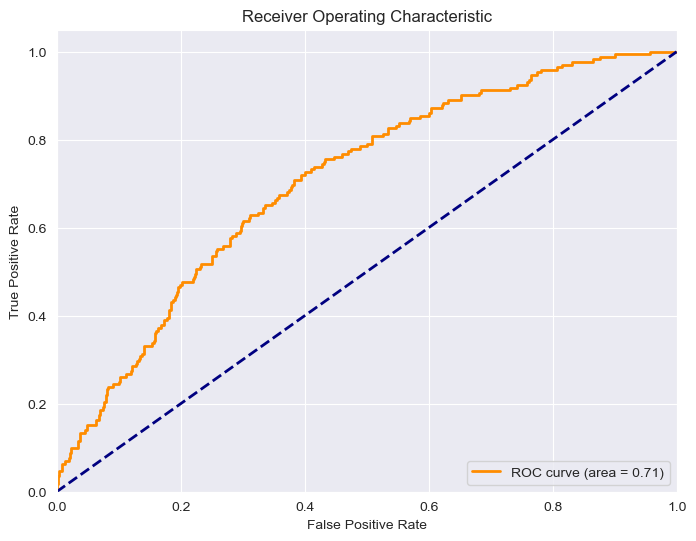

In [32]:
choose_log_r=LogisticRegression(random_state=42,max_iter=100)
train_classifier(choose_log_r,x_train1,y_train,x_test1,y_test)

After applying **Logistic Regression** to the data, the accuracy results are as follows:
- **Training Accuracy**: 86%
- **Testing Accuracy**: 84%
- **Training recall**: 8.5%
- **Testing recall**: 4.6%
---

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
svc=SVC()

grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(x_train1, y_train)

print("Best parameters:", grid.best_params_)


---
### Finding the Best Hyperparameters for SVC Using GridSearch but this will take so much time 
if you want to apply gridsearch on SVC change the upper cell from markdown to code type and run it . 


Accuracy for train is : 0.9430638565586662 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.6157112526539278 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2708
           1       1.00      0.62      0.76       471

    accuracy                           0.94      3179
   macro avg       0.97      0.81      0.86      3179
weighted avg       0.95      0.94      0.94      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2708    0]
 [ 181  290]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


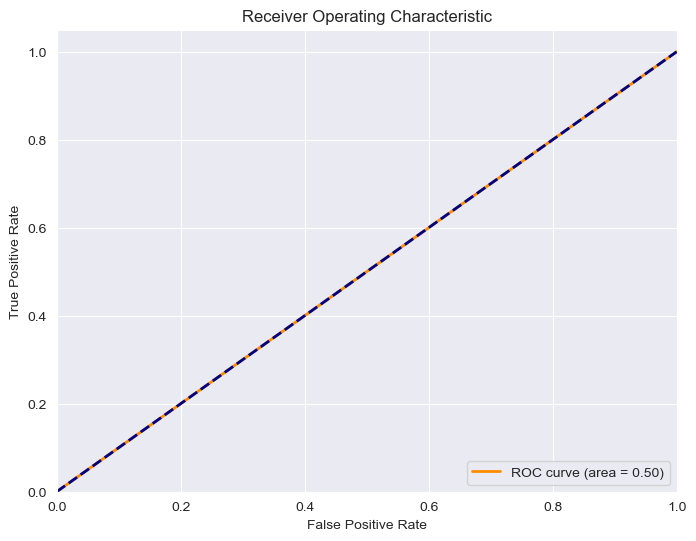

In [33]:
svc=SVC(C=1,gamma=1,kernel="rbf",probability=True)
train_classifier(svc,x_train1,y_train,x_test,y_test)

After applying **SVC** to the data, the accuracy results are as follows:
- **Training Accuracy**: 94%
- **Testing Accuracy**: 84%
- **Training recall**: 61%
- **Testing recall**: 0%
---

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [4,5],
    'min_samples_leaf': [3,4],
}
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)


---
### Finding the Best Hyperparameters for Random Forest Using GridSearch but this will take so much time. 
if you want to apply gridsearch on RandomForest change the upper cell from markdown to code type and run it . 


Accuracy for train is : 0.9458949355143127 %   Accuracy for test is : 0.8358490566037736 % 
recall for train is : 0.6348195329087049 %   recall for test is : 0.03488372093023256 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2708
           1       1.00      0.63      0.78       471

    accuracy                           0.95      3179
   macro avg       0.97      0.82      0.87      3179
weighted avg       0.95      0.95      0.94      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       888
           1       0.43      0.03      0.06       172

    accuracy                           0.84      1060
   macro avg       0.63      0.51      0.49      1060
weighted avg       0.77      0.84      0.77      1060


Confusion Matrix for train :
[[2708    0]
 [ 172  299]]

Confusion Matrix for test :
[[880   8]

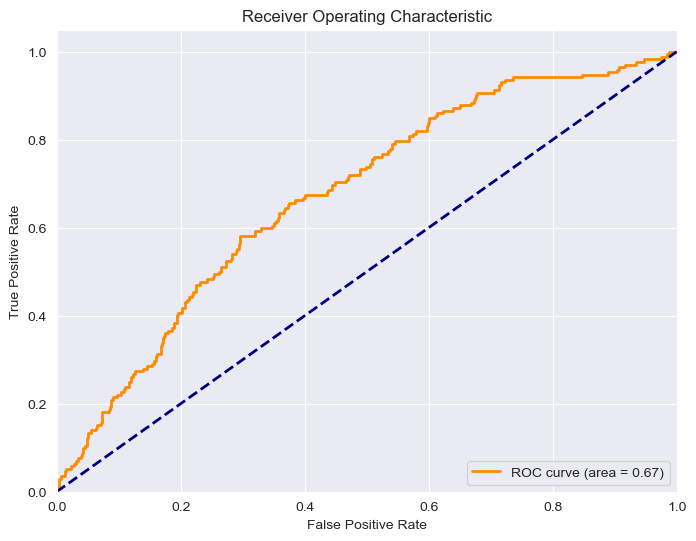

In [34]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=2,min_samples_split=2)
train_classifier(rf_model,x_train,y_train,x_test,y_test)

After applying **Random Forest** to the data, the accuracy results are as follows:
- **Training Accuracy**: 95%
- **Testing Accuracy**: 83%
- **Training recall**: 64%
- **Testing recall**: 2%
----

### Model Selection: Logistic Regression as the Best Model

Based on the results, we consider **Logistic Regression** to be the best model for this dataset. by givinig me best accurarcy for testing  Both **Random Forest** and **SVC** models showed signs of overfitting, making them less suitable for this analysis. Logistic Regression, on the other hand, provides a more stable and reliable performance on both the training and testing sets.

### now we can try reduce dimensions by using  principal component analysis [PCA]

Explained Variance Ratio: [0.29610516 0.13741578]
Cumulative Explained Variance: [0.29610516 0.43352093]


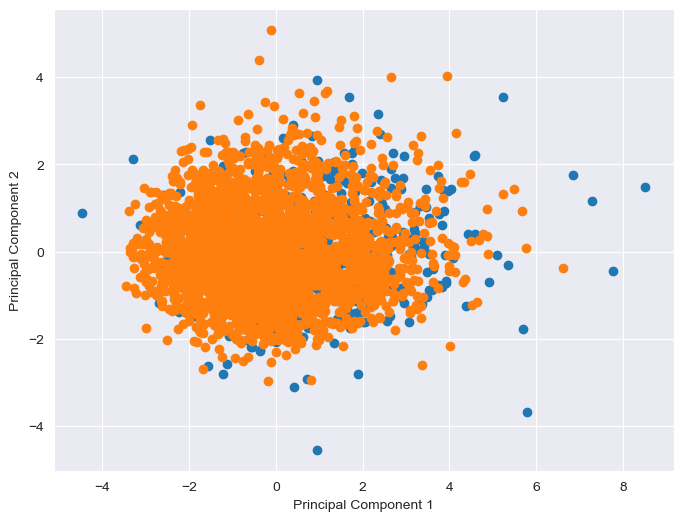

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


plt.figure(figsize=(8, 6))
for i, label in enumerate(y_train.unique()):
    plt.scatter(x_train_pca[y_train == label, 0], x_train_pca[y_train == label, 1])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Accuracy for train is : 0.8530984586347908 %   Accuracy for test is : 0.8358490566037736 % 
recall for train is : 0.01910828025477707 %   recall for test is : 0.011627906976744186 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2708
           1       0.64      0.02      0.04       471

    accuracy                           0.85      3179
   macro avg       0.75      0.51      0.48      3179
weighted avg       0.82      0.85      0.79      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.33      0.01      0.02       172

    accuracy                           0.84      1060
   macro avg       0.59      0.50      0.47      1060
weighted avg       0.76      0.84      0.77      1060


Confusion Matrix for train :
[[2703    5]
 [ 462    9]]

Confusion Matrix for test :
[[884   

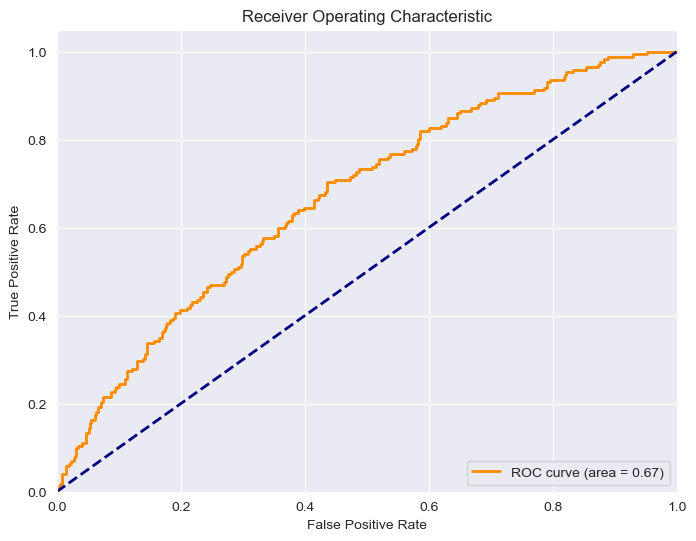

In [36]:
log_r=LogisticRegression(random_state=42)
train_classifier(log_r,x_train_pca,y_train,x_test_pca,y_test)

#### Decision Boundary Plot for Logistic Regression with Two Features

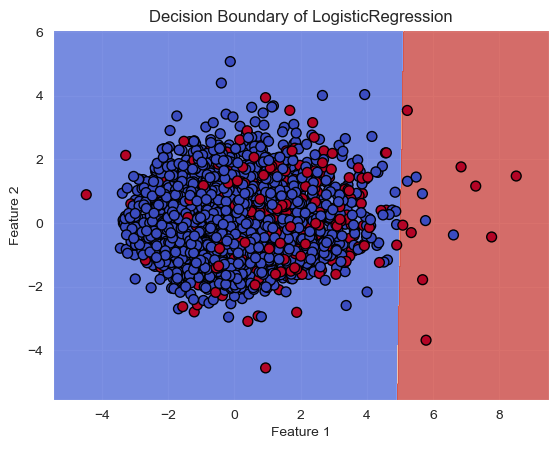

In [37]:
plot_decision_boundary(log_r,x_train_pca,y_train)

Accuracy for train is : 0.8578169235608682 %   Accuracy for test is : 0.8339622641509434 % 
recall for train is : 0.04883227176220807 %   recall for test is : 0.011627906976744186 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2708
           1       0.85      0.05      0.09       471

    accuracy                           0.86      3179
   macro avg       0.85      0.52      0.51      3179
weighted avg       0.86      0.86      0.80      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       888
           1       0.25      0.01      0.02       172

    accuracy                           0.83      1060
   macro avg       0.54      0.50      0.47      1060
weighted avg       0.74      0.83      0.77      1060


Confusion Matrix for train :
[[2704    4]
 [ 448   23]]

Confusion Matrix for test :
[[882   

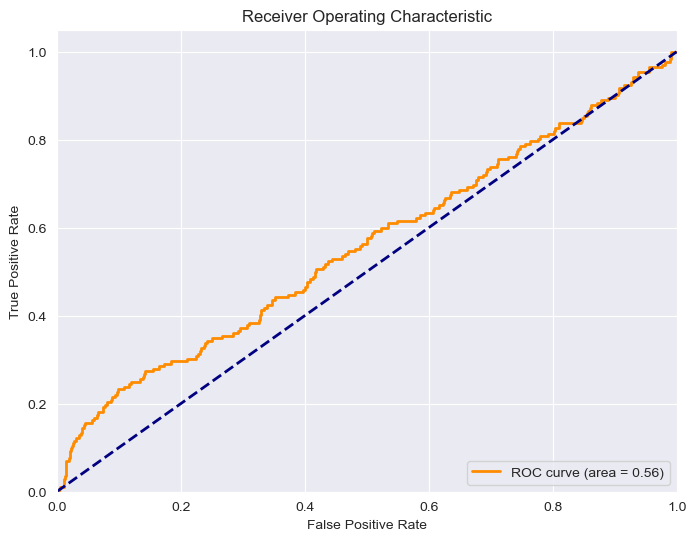

In [38]:
svc=SVC(C=10,gamma=1,kernel="rbf",probability=True)
train_classifier(svc,x_train_pca,y_train,x_test_pca,y_test)

#### Decision Boundary Plot for SVC with Two Features


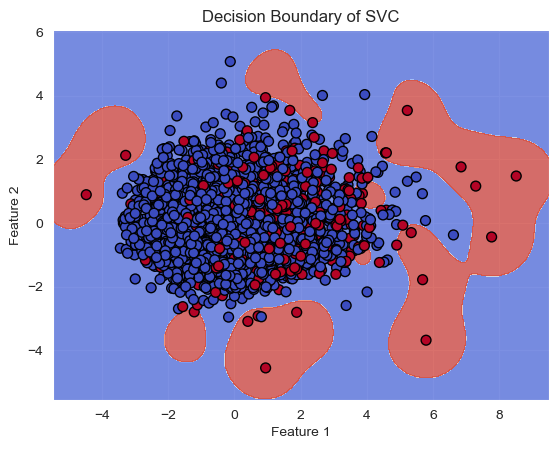

In [39]:
plot_decision_boundary(svc,x_train_pca,y_train)

Accuracy for train is : 0.8820383768480654 %   Accuracy for test is : 0.8320754716981132 % 
recall for train is : 0.21443736730360935 %   recall for test is : 0.029069767441860465 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2708
           1       0.95      0.21      0.35       471

    accuracy                           0.88      3179
   macro avg       0.92      0.61      0.64      3179
weighted avg       0.89      0.88      0.85      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       888
           1       0.31      0.03      0.05       172

    accuracy                           0.83      1060
   macro avg       0.58      0.51      0.48      1060
weighted avg       0.75      0.83      0.77      1060


Confusion Matrix for train :
[[2703    5]
 [ 370  101]]

Confusion Matrix for test :
[[877  1

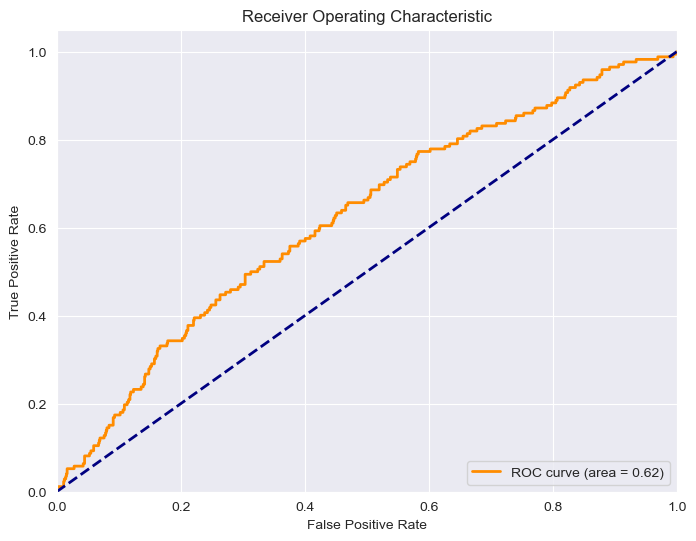

In [40]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=3,min_samples_split=4)
train_classifier(rf_model,x_train_pca,y_train,x_test_pca,y_test)

### Decision Boundary Plot for Random Forest with Two Features

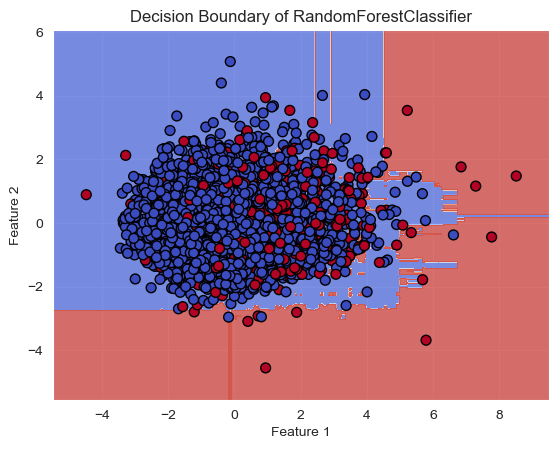

In [41]:
plot_decision_boundary(rf_model,x_train_pca,y_train)

### Reducing Dimensions Using PCA to 2D for Data Visualization

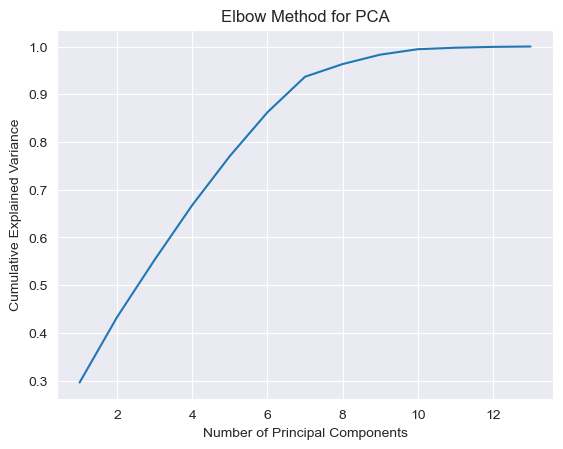

In [42]:
pca = PCA()
pca.fit(x_train1)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()



### Using the Elbow Technique to Find the Best Number of Dimensions

We apply the **Elbow Technique** to determine the optimal number of dimensions for PCA. This method involves plotting the explained variance against the number of dimensions and identifying the "elbow point," where the variance begins to plateau. This helps us choose the most appropriate number of dimensions for our analysis.

In [43]:
pca = PCA(n_components=7)  # Reduce to 7 principal components
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)

### New Data After PCA Transformation

After applying **Principal Component Analysis (PCA)**, we now have the transformed data:
- **x_train_pca**: The PCA-transformed training data.
- **x_test_pca**: The PCA-transformed testing data.

These datasets are now reduced to the optimal number of dimensions for further analysis and modeling (7 features).

In [44]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(3179, 7)
(1060, 7)


Accuracy for train is : 0.859389745202894 %   Accuracy for test is : 0.840566037735849 % 
recall for train is : 0.07855626326963906 %   recall for test is : 0.040697674418604654 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2708
           1       0.74      0.08      0.14       471

    accuracy                           0.86      3179
   macro avg       0.80      0.54      0.53      3179
weighted avg       0.84      0.86      0.81      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.64      0.04      0.08       172

    accuracy                           0.84      1060
   macro avg       0.74      0.52      0.49      1060
weighted avg       0.81      0.84      0.78      1060


Confusion Matrix for train :
[[2695   13]
 [ 434   37]]

Confusion Matrix for test :
[[884   4]

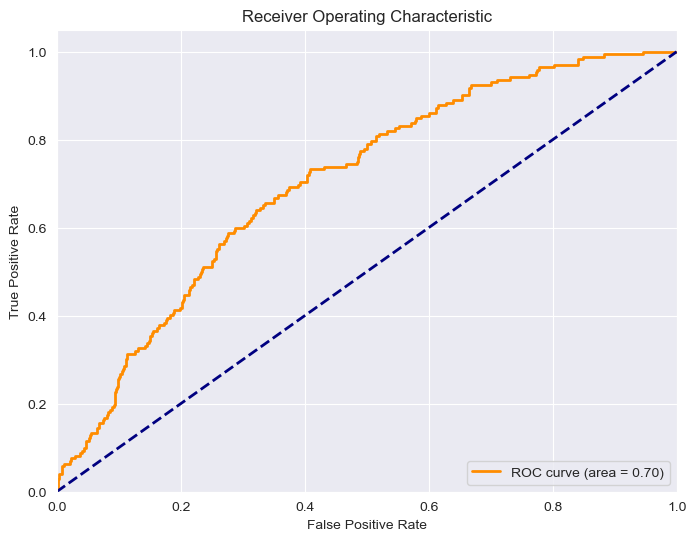

In [45]:
log_r=LogisticRegression(random_state=42)
train_classifier(log_r,x_train_pca,y_train,x_test_pca,y_test)

After applying **Logistic Regression** to the data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 86%
- **Testing_pca Accuracy**: 84%
- **Training recall**: 7.8%
- **Testing recall**: 4.6%

Accuracy for train is : 0.9943378420887071 %   Accuracy for test is : 0.7981132075471699 % 
recall for train is : 0.9617834394904459 %   recall for test is : 0.11046511627906977 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2708
           1       1.00      0.96      0.98       471

    accuracy                           0.99      3179
   macro avg       1.00      0.98      0.99      3179
weighted avg       0.99      0.99      0.99      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       888
           1       0.24      0.11      0.15       172

    accuracy                           0.80      1060
   macro avg       0.54      0.52      0.52      1060
weighted avg       0.75      0.80      0.77      1060


Confusion Matrix for train :
[[2708    0]
 [  18  453]]

Confusion Matrix for test :
[[827  61]

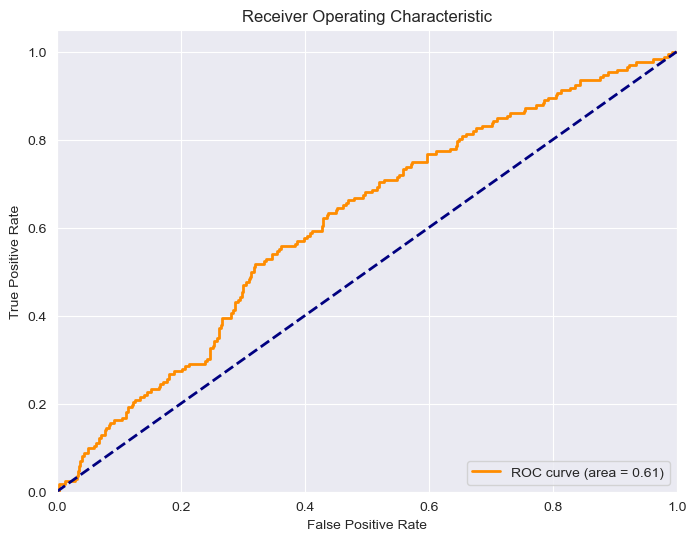

In [46]:
choose_svc=SVC(C=10,gamma=1,kernel="rbf",probability=True)
train_classifier(choose_svc,x_train_pca,y_train,x_test_pca,y_test)

After applying **SVC** to the data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 99%
- **Testing_pca Accuracy**: 80%
- **Training recall**: 96%
- **Testing recall**: 11%

Accuracy for train is : 0.9081472161056936 %   Accuracy for test is : 0.8330188679245283 % 
recall for train is : 0.3821656050955414 %   recall for test is : 0.029069767441860465 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2708
           1       0.99      0.38      0.55       471

    accuracy                           0.91      3179
   macro avg       0.95      0.69      0.75      3179
weighted avg       0.92      0.91      0.89      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       888
           1       0.33      0.03      0.05       172

    accuracy                           0.83      1060
   macro avg       0.59      0.51      0.48      1060
weighted avg       0.76      0.83      0.77      1060


Confusion Matrix for train :
[[2707    1]
 [ 291  180]]

Confusion Matrix for test :
[[878  10

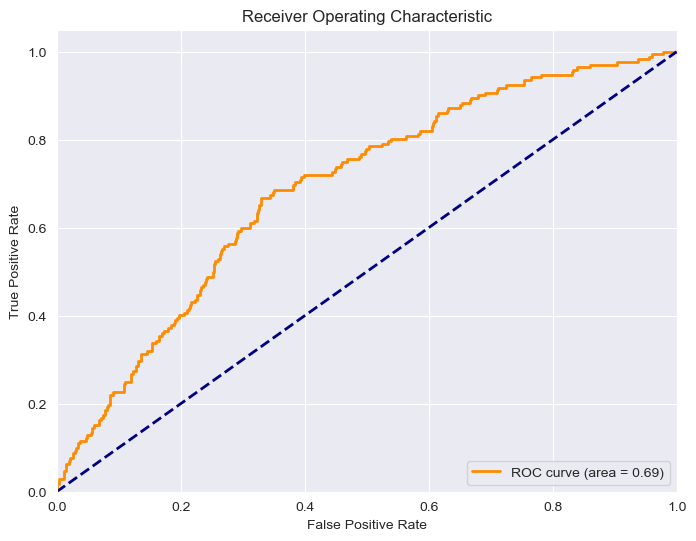

In [47]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=3,min_samples_split=4)
train_classifier(rf_model,x_train_pca,y_train,x_test_pca,y_test)

After applying **Random Forest** to the data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 91%
- **Testing_pca Accuracy**: 83%
- **Training recall**: 39%
- **Testing recall**: 4%

### final Model Selection: Logistic Regression and SVC with PCA Data

Based on the results:  
- **SVC with PCA Data**:  
  - Best suited if **Recall** is the priority.  
  - This model effectively identifies individuals with heart disease (high True Positive Rate).  

- **Logistic Regression**:  
  - Best suited if **Accuracy** is the priority.  
  - This model provides balanced performance across all metrics without overfitting.  

### Implementation Plan

To allow users to try both models, we will:  
1. **Deploy the Models in Streamlit**:  
   - Create a user interface where individuals can select between the two models.  
2. **Interactive Comparison**:  
   - Users can input data and see predictions from both models.  
This approach ensures flexibility and empowers users to choose the model based on their priorities.

### Saving the Models in a Dictionary for Serialization

To prepare for deployment, we save the trained models in a dictionary and serialize them into a `.pkl` file for later use.


In [48]:
models={"log_reg":choose_log_r,"svc":choose_svc}

### final Saving Encoders, Scalers, Columns, Models, and PCA Objects to Pickle

To ensure reusability during deployment, save the following objects into a `.pkl` file:

1. **Encoders**:  
   Used to transform categorical columns.

2. **Scaler**:  
   Used to standardize continuous columns.

3. **Columns**:  
   The list of features used in the models.

4. **Models**:  
   The trained models (Logistic Regression, SVC with PCA).

5. **PCA**:  
   The PCA object for transforming the data.


In [49]:
with open("encoders.pkl","wb") as f :
    pickle.dump(encoders,f)
with open("scaller.pkl","wb") as f :
    pickle.dump(scaller,f)
with open("fetures.pkl","wb") as f :
    pickle.dump(X.columns,f)
with open("PCA.pkl","wb") as f :
    pickle.dump(pca,f)
with open("models.pkl","wb") as f :
    pickle.dump(models,f)



Thank you for taking the time to review my project notebook.  
I hope you found it informative and valuable!
### 😊  Stay happy and healthy! 😊
